# 최대 가능도 추정(MLE, Maximum liklihood Estimation)

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = 'height.txt'

In [13]:
xs = np.loadtxt(path)
xs.shape

(25000,)

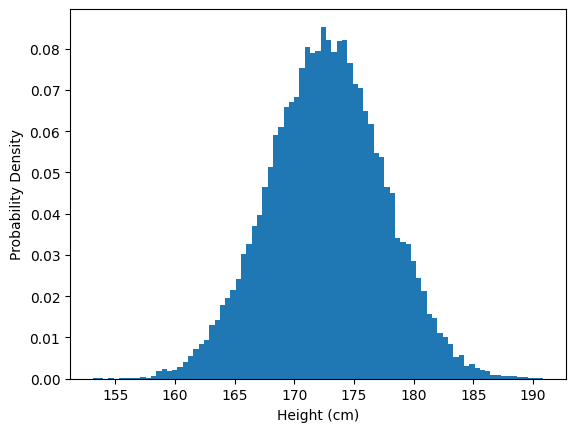

In [16]:
plt.hist(xs, bins="auto", density=True)
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.savefig('C:\\Users\\blue2\\OneDrive\\문서\\DLFromScratch5\\Chapter02\\result_image\\height_hist.png')
plt.show()

- $$ \mathcal{D} = \{ x^{1}, x^{2}, \dots, x^{N} \} $$ 
- 가 존재할 때, N개의 data를 얻을수 있는 확률 밀도는 각 데이터의 확률 밀도의 곱으로 표현됨
- $$ p(\mathcal{D}; \theta) = \prod_{n=1}^{N} p(x^{n}; \theta) $$
- $$ \theta = \underset{\theta}{\operatorname{\argmax}}\, L(\theta), \quad \text{where} \quad L(\theta) = \prod_{n=1}^{N} p(x^{n}; \theta) $$
- 일반적으로 여기에 로그를 달아서 `log-likelihood`를 최대화함

### 정규분포의 최대 가능도 추정

$$  \frac{\partial L(\theta)}{\partial \mu} = 0, \frac{\partial L(\theta)}{\partial \sigma} \Big|_{\mu = \hat{\mu}}= 0  $$ 
- 가 각각 0이 되는 지점을 구하면 됨.
<br/>
<br/>
- 유도과정은 생략, 결론은...
- $$ \hat{\mu} = \frac{1}{N} \sum_{n=1}^{N} x^{n} , \hat{\sigma} = \sqrt{\frac{1}{N} \sum_{n=1}^{N} (x^{n} - \hat{\mu})^2} $$


### mu, sigma를 매개변수로 가지는 모델 구현

In [17]:
path = "height.txt"
xs = np.loadtxt(path)

mu = np.mean(xs)
sigma = np.std(xs)

mu, sigma

(np.float64(172.70250853667997), np.float64(4.830167473396299))

In [19]:
np.random.normal(loc=0.0, scale=1.0, size=None) # < loc=mean, scale=std
sample = np.random.normal(mu, sigma)
sample

171.00085036398423

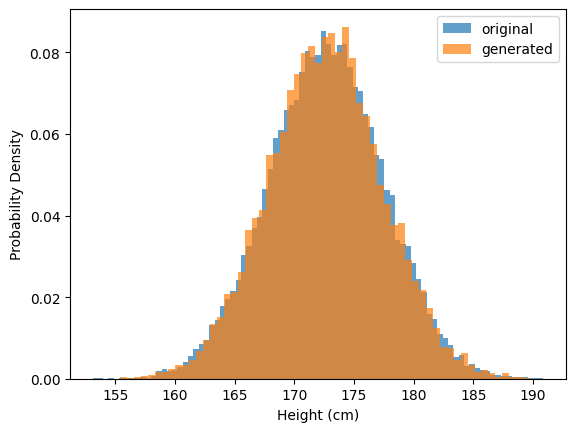

In [20]:
path = "height.txt"
xs  = np.loadtxt(path)

mu = np.mean(xs)
sigma = np.std(xs)
samples = np.random.normal(mu, sigma, 10000)

plt.hist(xs, bins="auto", density=True, alpha=.7, label="original")
plt.hist(samples, bins="auto", density=True, alpha=.7, label="generated")
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.savefig('C:\\Users\\blue2\\OneDrive\\문서\\DLFromScratch5\\Chapter02\\result_image\\height_hist_compare.png')
plt.show()


### scipy를 이용하여 확률 구하기

- $$ X \sim N(0, 1) $$

- $$ F(1) = \int_{-\infty}^{1} p(x) \, dx \approx 0.8413 $$

- cdf의 확률 값을 바로 출력


In [22]:
from scipy.stats import norm

x = 1.0
p = norm.cdf(x, loc=0, scale=1)
print(p)

0.8413447460685429


In [24]:
import numpy as np
from scipy.stats import norm

path = "height.txt"
xs = np.loadtxt(path)
mu = np.mean(xs)
sigma = np.std(xs)

p1 = norm.cdf(160, loc=mu, scale=sigma)
print(f"p(x <= 160): {p1}")

p2 = norm.cdf(180, loc=mu, scale=sigma)
print(f"p(x > 170): {1-p2}")

p(x <= 160): 0.004271406830855
p(x > 170): 0.06541774339950823
